In [1]:
import meerkat as mk

In [2]:
ngoa = mk.get("ngoa")

,(ImageColumn)
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

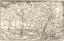
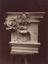
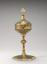
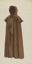
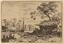
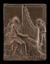
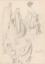
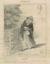
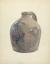
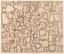

In [3]:
ngoa[]

,constituentid (PandasSeriesColumn),ulanid (PandasSeriesColumn),preferreddisplayname (PandasSeriesColumn),forwarddisplayname (PandasSeriesColumn),lastname (PandasSeriesColumn),displaydate (PandasSeriesColumn),artistofngaobject (PandasSeriesColumn),beginyear (PandasSeriesColumn),endyear (PandasSeriesColumn),visualbrowsertimespan (PandasSeriesColumn),nationality (PandasSeriesColumn),visualbrowsernationality (PandasSeriesColumn),constituenttype (PandasSeriesColumn)
0,9,NaN,Anonymous,Anonymous,NaN,Anonymous,0,NaN,NaN,NaN,NaN,Other,anonymous
1,11,NaN,"Baldung, Hans",Hans Baldung,Baldung,NaN,1,NaN,NaN,NaN,NaN,Other,individual
2,12,NaN,National Gallery of Art,National Gallery of Art,NaN,NaN,0,NaN,NaN,NaN,NaN,Other,corporate
3,13,NaN,Anonymous Artist,Anonymous Artist,Anonymous Artist,NaN,1,NaN,NaN,NaN,Unknown,Other,anonymous
4,14,NaN,"Evans, Thomas M., Mrs.",Mrs. Thomas M. Evans,Evans,"American, 1923 - 2013",0,1923.0,2013.0,1901 to 1925,American,American,individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26097,52681,NaN,"Greenbury, Richard",Richard Greenbury,Greenbury,"English, 1600 - c. 1670",1,1600.0,1670.0,1551 to 1600,English,English,individual
26098,52702,NaN,"Rodríquez, Lourdes and Alejandro",Lourdes and Alejandro Rodríquez,Rodríquez,NaN,0,NaN,NaN,NaN,NaN,Other,couple
26099,52710,NaN,"James, Walter Henry",Walter Henry James,James,"British, 1846 - 1923",0,1846.0,1923.0,1826 to 1850,British,British,individual
26100,52711,NaN,Raphael King Ltd.,Raphael King Ltd.,NaN,British,0,NaN,NaN,NaN,British,British,corporate


b'{"batchcomplete":"","query":{"searchinfo":{"totalhits":2},"search":[{"ns":0,"title":"Q7326058","pageid":7232298,"size":null,"wordcount":0,"snippet":"British businessman","timestamp":"2021-08-18T19:52:15Z"},{"ns":0,"title":"Q7344934","pageid":7252005,"size":null,"wordcount":0,"snippet":"British artist (1600-1670)","timestamp":"2021-12-01T12:25:59Z"}]}}'

In [87]:
ngoa["published_images"].remove_column("image")

In [ ]:
ngo

In [56]:
import requests
out = requests.get("https://api.nga.gov/iiif/00004dec-8300-4487-8d89-562d0126b6a1/full/!200,200/0/default.jpg")

In [59]:
type(out.content)

bytes

In [10]:
published_images = ngoa['published_images']
objects = ngoa['objects']
objects_constituents = ngoa['objects_constituents']
constituents = ngoa['constituents']
constituents_text_entries = ngoa['constituents_text_entries']
locations = ngoa['locations']

# Merge the images and embeddings into the published_images table
# published_images = mk.merge(published_images, dp, on="uuid")

# Merge the published_images and objects tables, along with embeddings saved on disk for the text columns in the objects
dp = mk.merge(published_images, objects, left_on='depictstmsobjectid', right_on='objectid')
dp = dp['objectid', 'uuid', 'image_224', 'parentid', 'beginyear', 'endyear', 'medium', 'dimensions', 'inscription', 'attribution', 'creditline', 'visualbrowserclassification']

<AxesSubplot: >

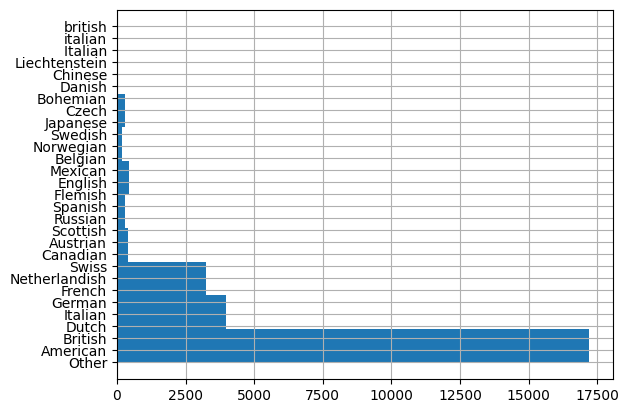

In [37]:
constituents["visualbrowsernationality"].hist(orientation="horizontal")

In [44]:
objects.merge(
    objects_constituents["objectid", "constituentid"], left_on="objectid", right_on="objectid"
).merge(
    constituents["constituentid", "visualbrowsernationality"], left_on="constituentid", right_on="constituentid"
)

,constituentid (PandasSeriesColumn),objectid (PandasSeriesColumn),accessioned (PandasSeriesColumn),accessionnum (PandasSeriesColumn),locationid (PandasSeriesColumn),title (PandasSeriesColumn),displaydate (PandasSeriesColumn),beginyear (PandasSeriesColumn),endyear (PandasSeriesColumn),visualbrowsertimespan (PandasSeriesColumn),medium (PandasSeriesColumn),dimensions (PandasSeriesColumn),inscription (PandasSeriesColumn),markings (PandasSeriesColumn),attributioninverted (PandasSeriesColumn),attribution (PandasSeriesColumn),provenancetext (PandasSeriesColumn),creditline (PandasSeriesColumn),classification (PandasSeriesColumn),subclassification (PandasSeriesColumn),visualbrowserclassification (PandasSeriesColumn),parentid (PandasSeriesColumn),isvirtual (PandasSeriesColumn),departmentabbr (PandasSeriesColumn),portfolio (PandasSeriesColumn),series (PandasSeriesColumn),volume (PandasSeriesColumn),watermarks (PandasSeriesColumn),lastdetectedmodification (PandasSeriesColumn),customprinturl (PandasSeriesColumn),visualbrowsernationality (PandasSeriesColumn)
0,12,88665,1,1994.43.3,NaN,Costume de serge blanc plissé.,1919,1919.0,1919.0,1901 to 1925,offset lithograph with watercolor applied through a stencil (pochoir print),plate: 17.1 x 12 cm (6 3/4 x 4 3/4 in.)\r\nsheet: 22.2 x 14.2 cm (8 3/4 x 5 9/16 in.),across bottom in plate: Costume de serge blanc plissé.; across top in plate: 1919 Almanach de mode No. 2,NaN,French 20th Century,French 20th Century,Richter Archives; gift to NGA Photo Archives (transferred to DCG in 1994).,George M. Richter Archive,Print,NaN,print,NaN,0,CG-W,"Almanach de Mode (Number 2, March 1919): pl. 3","Almanach de Mode (Number 2, March 1919): pl. 3",NaN,NaN,2019-10-28 22:01:34.883-04,NaN,Other
1,12,88666,1,1994.43.4,NaN,"Robe de lainage, couleur taupe avec de la broderie de laine bleue. Chapeau de paille garni de fleurs.",1919,1919.0,1919.0,1901 to 1925,offset lithograph with watercolor applied through a stencil (pochoir print),plate: 17.1 x 12 cm (6 3/4 x 4 3/4 in.)\r\nsheet: 22.2 x 14 cm (8 3/4 x 5 1/2 in.),"across bottom in plate: Robe de lainage, couleur taupe avec de la broderie de laine / bleue. Chapeau de paille garni de fleurs.; across top in plate: 1919 Almanach de mode No. 4",NaN,French 20th Century,French 20th Century,Richter Archives; gift to NGA Photo Archives (transferred to DCG in 1994).,George M. Richter Archive,Print,NaN,print,NaN,0,CG-W,"Almanach de Mode (Number 1, March 1919): pl. 4","Almanach de Mode (Number 1, March 1919): pl. 4",NaN,NaN,2019-10-28 22:01:34.883-04,NaN,Other
2,12,89684,1,1994.59.11,8711.0,Breton Village,c. 1890,1890.0,1890.0,1876 to 1900,oil on canvas,overall: 22.5 x 32.5 cm (8 7/8 x 12 13/16 in.)\r\nframed: 31.9 x 41.9 x 3.5 cm (12 9/16 x 16 1/2 x 1 3/8 in.),"lower left, in red and purple paint: ODILON REDON.",NaN,"Redon, Odilon",Odilon Redon,"Simone Deluy, France; sold 1958 to (Wildenstein & Co., New York);[1] sold November 1969 to Mr. and Mrs. Paul Mellon, Upperville, VA; gift 1994 to NGA.\r\n\r\n\r\n[1] Wildenstein's acquisition date and source according to letter dated 14 December 1998, in NGA curatorial files.",Collection of Mr. and Mrs. Paul Mellon,Painting,NaN,painting,NaN,0,CF,NaN,NaN,NaN,NaN,2020-01-29 17:19:00.247-05,NaN,Other
3,12,91217,1,1994.66.7,NaN,Letters to Earth VII,1990-1991,1990.0,1991.0,1976 to 2000,"soft-ground etching, sugar-lift, and aquatint in blue on Somerset Satin paper",plate: 40 x 32.6 cm (15 3/4 x 12 13/16 in.)\r\nsheet: 60.5 x 48 cm (23 13/16 x 18 7/8 in.),lower left in graphite: ap 4/10 - VII; lower right in graphite: Edda Renouf '90,NaN,"Renouf, Edda",Edda Renouf,"The artist, Paris; gift to NGA, 1994.",Gift of the Artist,Print,NaN,print,91211.0,0,CG-W,Letters to Earth,Letters to Earth,NaN,NaN,2020-05-06 22:01:32.06-04,NaN,Other
4,12,92745,1,1996.120.1,NaN,Arctic Sunset,1973,1973.0,1973.0,1951 to 1975,"red, yellow, and blue gouache and black ink on wove paper",overall: 74.3 x 109.9 cm (29 1/4 x 43 1/4 in.),lower right in black ink: Calder 73,BS: L

In [43]:
constituents.columns

['constituentid',
 'ulanid',
 'preferreddisplayname',
 'forwarddisplayname',
 'lastname',
 'displaydate',
 'artistofngaobject',
 'beginyear',
 'endyear',
 'visualbrowsertimespan',
 'nationality',
 'visualbrowsernationality',
 'constituenttype']

In [14]:
dp["elapsed"] = dp["endyear"] - dp["beginyear"] 

In [20]:
elapsed = dp.groupby("attribution")["elapsed"].mean()

In [23]:
elapsed["count"] = dp.groupby("attribution")["elapsed"].count()["elapsed"]

In [27]:
elapsed[elapsed["count"] > 10].sort(by="elapsed", ascending=False)

,elapsed (NumpyArrayColumn),attribution (PandasSeriesColumn),count (NumpyArrayColumn)
0,131.0,Jean-Baptiste Rigaud,24
1,124.444444,Master of Coriolanus,18
2,120.0,Ludwig of Ulm,11
3,119.0,G. Douglas,13
4,108.0,Bernhard Hasler,23
...,...,...,...
1639,0.0,Jason Leese,17
1640,0.0,Eldora P. Lorenzini,19
1641,0.0,Eleanor Antin,51
1642,0.0,Eleanore Mikus,14


In [30]:
dp.lz[dp["attribution"] == "Jean-Baptiste Rigaud"]

,objectid (PandasSeriesColumn),uuid (PandasSeriesColumn),parentid (PandasSeriesColumn),beginyear (PandasSeriesColumn),endyear (PandasSeriesColumn),medium (PandasSeriesColumn),dimensions (PandasSeriesColumn),inscription (PandasSeriesColumn),attribution (PandasSeriesColumn),creditline (PandasSeriesColumn),visualbrowserclassification (PandasSeriesColumn),elapsed (PandasSeriesColumn)
0,33180,12f9f72b-fa48-4739-bb97-dbd8b8ece3d8,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
1,33174,130fef1e-b5a2-428b-919f-46c5f43eb910,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
2,33177,22af57ef-e567-46ce-88df-2b4cbebde9eb,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
3,33171,35c9754c-27d8-4d8f-966f-6d0eee887c36,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
4,33172,435f9577-1faf-472e-bd57-2b4c91fc6d54,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19,33178,ea26fde3-074c-4332-a6cc-c20970a8dfd8,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
20,33193,f52fc9b7-5353-47a0-8bfc-6b53d4bbb9d7,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
21,33184,f88786d0-cc60-4c5f-b673-db10d0bb8024,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
22,33186,f8fa16e5-e3d3-4b1b-9304-bf8c31373d30,NaN,1681.0,1812.0,etching and engraving,NaN,NaN,Jean-Baptiste Rigaud,Rosenwald Collection,print,131.0
